In [ ]:
# Перед вами данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней.
# И таблица с характеристиками рекламных клиентов (тех, кто разместил эти объявления).

# Задачи
# Разберемся с распределением количества показов и кликов.
# Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).
# Нарисуйте график распределения показов на объявление за весь период.
# Давайте посчитаем скользящее среднее показов с окном 2.
# Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?
# Скользящее среднее часто используется для поиска аномалий в данных.
# Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов.
# В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним?
# Дни, в которых скользящее среднее равно NaN, не учитываем. 
# *Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименьшим количеством показов)
# в день, в который была замечена самая большая по модулю аномалия. 
# Теперь подгрузим данные по рекламным клиентам
# и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.
# Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней.
# Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))
# Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30.
# Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).
# Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]
# А теперь – выведем на интерактивный график эти категории с количеством уникальных клиентов в них.

# Описание данных
# ads_data.csv – данные взаимодействий с рекламными объявлениями

# date – дата
# time – время
# event – действие (просмотр/клик)
# platform – платформа
# ad_id – id объявления
# client_union_id – id рекламного кабинета
# campaign_union_id – id рекламной кампании
# ad_cost_type – тип оплаты
# ad_cost – цена
# has_video – есть ли видео
# target_audience_count – размер аудитории
# ads_clients_data.csv – характеристики рекламных клиентов

# date – дата
# client_union_id – id рекламного кабинета
# community_id – id сообщества
# create_date – дата создания рекламного клиента

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

In [2]:
path_to_ads_data = 'ads_data.csv'
path_to_ads_clients_data = 'ads_clients_data.csv'
df = pd.read_csv(path_to_ads_data)
data = pd.read_csv(path_to_ads_clients_data)

In [3]:
# Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям.
# Тонкий момент: помните, что некоторые показываемые объявления не кликались,
# и при группировке в таких случаях не будет строк с кликами,
# а для подсчёта среднего по объявлениям их нужно учитывать. Округлите ответы до целых чисел.

event_df = df \
    .groupby(['ad_id', 'event'], as_index = False) \
    .agg({'date': 'count'}) \
    .pivot(index = 'ad_id', \
           columns = 'event', \
           values = 'date') \
    .fillna(0)
event_df_mean = event_df.mean().round()
event_df_mean

event
click    113.0
view     923.0
dtype: float64

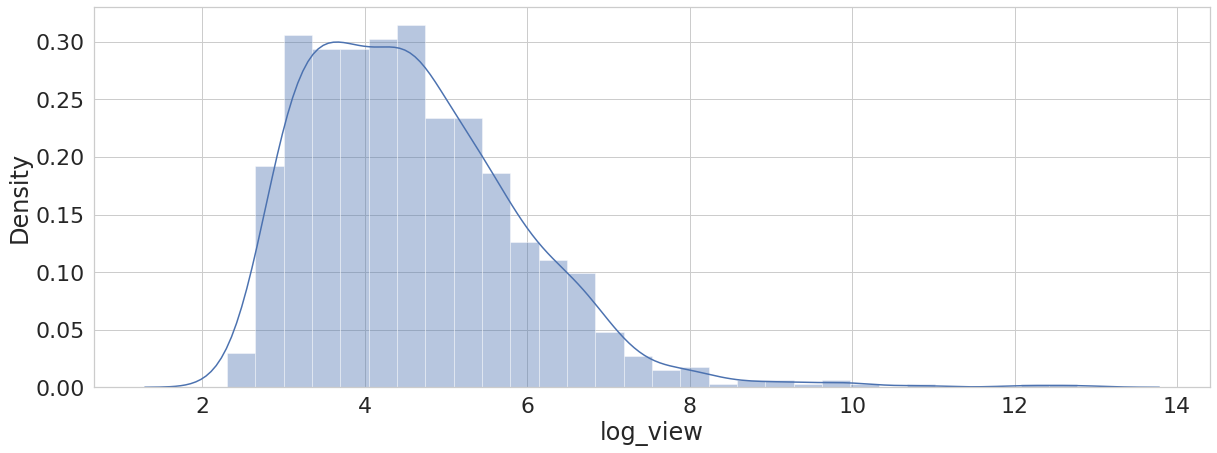

In [4]:
# Давайте посмотрим на распределение показов объявлений!

# По оси x – число показов
# По оси y – доля объявлений с такими показами
# Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения.

# sns.set(
#    font_scale=2,
#    style="whitegrid",
#    rc={'figure.figsize':(20,7)}
#        )

event_df['log_view'] = np.log(event_df.view)
event_log = event_df.query('log_view > 0')
sns.distplot(event_log.log_view)

In [5]:
# Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням,
# не учитывая объявления, у которых не было показов (обычное среднее).
# После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.

# Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

views_per_day = df \
    .query('event == "view"') \
    .groupby(['ad_id', 'date'], as_index = False) \
    .agg({'time': 'count'})
    
views_per_day_mean = views_per_day \
    .groupby(['date'], as_index = False) \
    .agg({'time': 'mean'})

views_per_day_mean['rolling_2'] = views_per_day_mean \
    .time \
    .rolling(2) \
    .mean() \
    .round()

views_per_day_mean = views_per_day_mean \
    .rename(columns = {'time': 'mean_value'})

views_per_day_mean

,date,mean_value,rolling_2
0,2019-04-01,154.482270,NaN
1,2019-04-02,137.786982,146.0
2,2019-04-03,163.952778,151.0
3,2019-04-04,675.901720,420.0
4,2019-04-05,919.109677,798.0
5,2019-04-06,277.122727,598.0


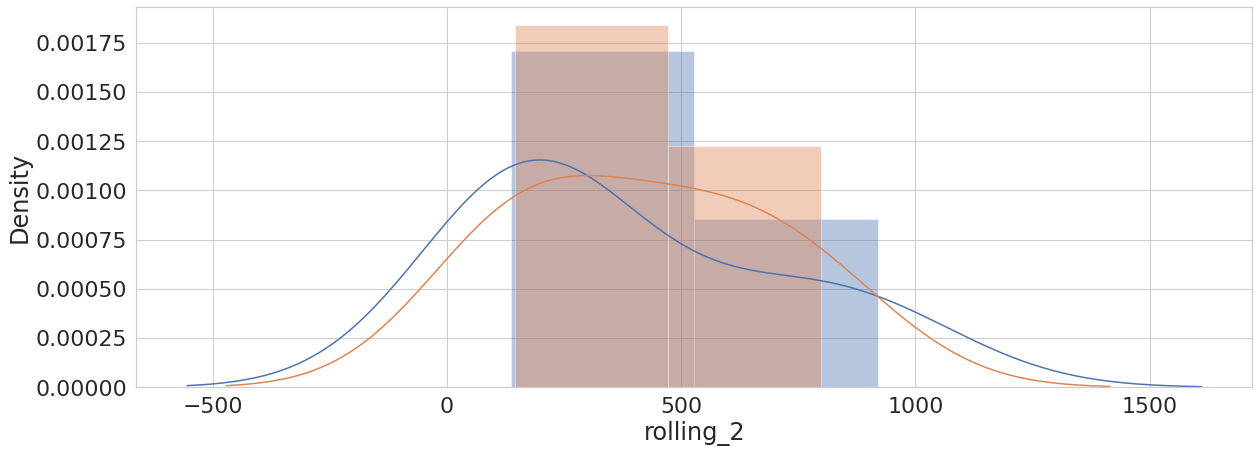

In [6]:
# Скользящее среднее часто используется для поиска аномалий в данных.
# Давайте попробуем нанести на один график значения просто среднего количества показов по дням
# и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).

# Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним?
# Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd

sns.distplot(views_per_day_mean.mean_value)
sns.distplot(views_per_day_mean.rolling_2)

In [7]:
views_per_day_mean['delta'] = views_per_day_mean.rolling_2 - views_per_day_mean.mean_value
views_per_day_mean

,date,mean_value,rolling_2,delta
0,2019-04-01,154.482270,NaN,NaN
1,2019-04-02,137.786982,146.0,8.213018
2,2019-04-03,163.952778,151.0,-12.952778
3,2019-04-04,675.901720,420.0,-255.901720
4,2019-04-05,919.109677,798.0,-121.109677
5,2019-04-06,277.122727,598.0,320.877273


In [8]:
df.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [9]:
data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [10]:
# Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней
# от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).

dff = df \
    .merge(data, how = 'left', on = 'client_union_id')

dff = dff \
    .rename(columns ={
    'date_x': 'ads_date',
    'date_y': 'client_reg_date'})

dff[['ads_date', 'time', 'client_reg_date', 'create_date']] = \
    dff[['ads_date', 'time', 'client_reg_date', 'create_date']] \
    .apply(pd.to_datetime)


dff['delta'] = dff.ads_date - dff.create_date

mean_days = dff \
    .groupby (['client_union_id', 'delta'], as_index = False) \
    .agg({'ad_id': 'count'}) \
    .delta \
    .mean()

mean_days

Timedelta('124 days 07:15:00.992282250')

In [11]:
dff.head()

,ads_date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,client_reg_date,community_id,create_date,delta
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,2020-05-07,-130337958,2018-12-25,97 days
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,2020-05-07,-130393498,2018-11-13,139 days
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,2020-05-07,-130929771,2018-08-18,226 days
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,2020-05-07,-130021201,2019-02-22,38 days


In [12]:
dff.dtypes

ads_date                  datetime64[ns]
time                      datetime64[ns]
event                             object
platform                          object
ad_id                              int64
client_union_id                    int64
campaign_union_id                  int64
ad_cost_type                      object
ad_cost                          float64
has_video                          int64
target_audience_count              int64
client_reg_date           datetime64[ns]
community_id                       int64
create_date               datetime64[ns]
delta                    timedelta64[ns]
dtype: object

In [15]:
# Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.
# Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов.
# Например, 1000 клиентов создали кабинет, но лишь 50 из них запустили рекламу. В таком случае конверсия будет равна
# 50 / 1000 * 100 = 5%
# Чтобы отобрать данные за нужный промежуток, можно воспользоваться сравнением времени до создания первой рекламы
# с pd.Timedelta(365, unit='day'))
# Ответ дайте в процентах и округлите до сотых.

year_line = pd.Timedelta(365, unit='day')
unique_cl = (dff.client_union_id.nunique())
total_unique_cl = (data.client_union_id.nunique())

answer = ((unique_cl / total_unique_cl) * 100).round()
answer

AttributeError: 'float' object has no attribute 'round'

In [15]:
# Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.
# Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).
# Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365].
# Создать временные промежутки можно с помощью pd.to_timedelta().

dff['delta'] = pd.cut(dff.delta, \
    bins = pd.to_timedelta( \
    ['0d', \
    '30d', \
    '90d', \
    '180d', \
    '365d']), \
    labels = \
    ['1 - 30 days', \
    '1 - 3 months', \
    '3 - 6 months', \
    '6 - 12 months'])

unique_clients_month = dff \
    .query('delta == "1 - 30 days"') \
    .client_union_id \
    .value_counts() \
    .nunique()

unique_clients_month

11

In [14]:
dff.head()

,ads_date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,client_reg_date,community_id,create_date,delta
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,2020-05-07,-130337958,2018-12-25,97 days
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,2020-05-07,-130393498,2018-11-13,139 days
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,2020-05-07,-130929771,2018-08-18,226 days
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,2020-05-07,-130021201,2019-02-22,38 days


In [16]:
# И последнее задание: постройте интерактивный барплот,
# на котором будут показаны категории с количеством уникальных клиентов в них
# (то, что у вас получилось на прошлом степе, по запуску первого рекламного объявления).

unique_clients = dff.groupby(['delta'], as_index = False) \
    .agg({'client_union_id' : 'nunique'})

unique_clients

,delta,client_union_id
0,1 - 30 days,11
1,1 - 3 months,265
2,3 - 6 months,399
3,6 - 12 months,169
